In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar.shape

(24, 2)

In [4]:
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [5]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

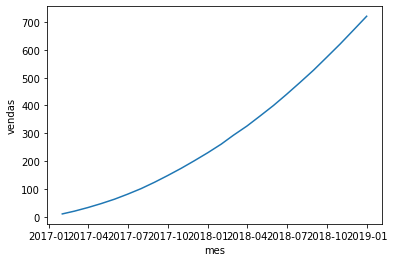

In [7]:
sns.lineplot(x='mes', y='vendas', data=alucar)

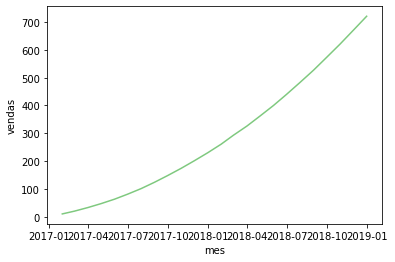

In [8]:
sns.set_palette('Accent')
sns.lineplot(x='mes', y='vendas', data=alucar)

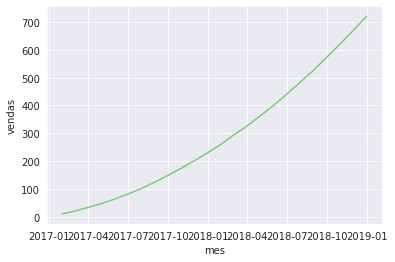

In [9]:
sns.set_style('darkgrid')
sns.lineplot(x='mes', y='vendas', data=alucar)

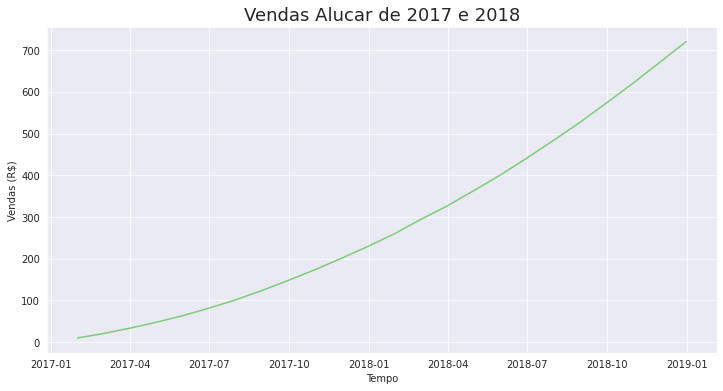

In [10]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6) #tamanho
ax.set_title('Vendas Alucar de 2017 e 2018', fontsize=18)
ax.set_xlabel('Tempo')
ax.set_ylabel('Vendas (R$)')
ax=ax #tirando descrição automática que vinha antes do gráfico

In [11]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [12]:
alucar['aumento'] = alucar['vendas'].diff()
#diff vê o quanto aumentou de uma linha pra outra naquela coluna. o incremento.

alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


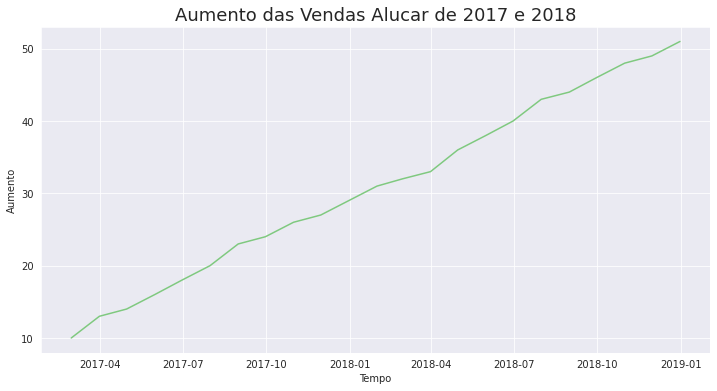

In [13]:
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6) #tamanho
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', fontsize=18)
ax.set_xlabel('Tempo')
ax.set_ylabel('Aumento')
ax=ax

In [14]:
def plotar(titulo, labelx, labely, x, y, dataset):
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6) #tamanho
  ax.set_title(titulo, fontsize=18)
  ax.set_xlabel(labely)
  ax.set_ylabel(labelx)
  ax=ax

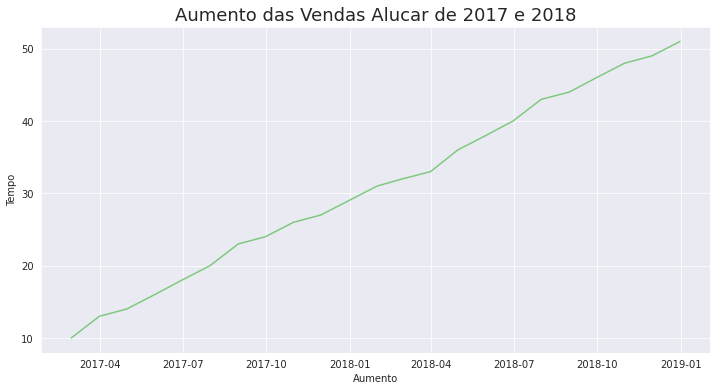

In [15]:
plotar('Aumento das Vendas Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [16]:
alucar['aceleracao'] = alucar['aumento'].diff()

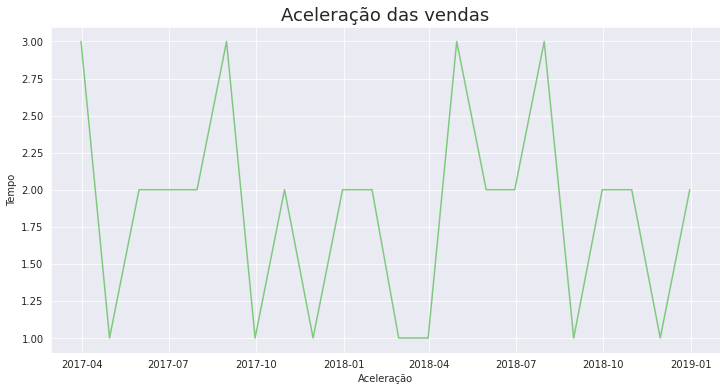

In [17]:
plotar('Aceleração das vendas', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

In [18]:
#correlação: máximo = 1 e mínimo = -1

from pandas.plotting import autocorrelation_plot

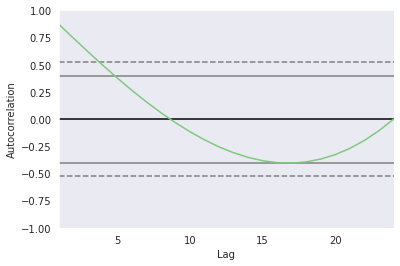

In [19]:
autocorrelation_plot(alucar['vendas'])

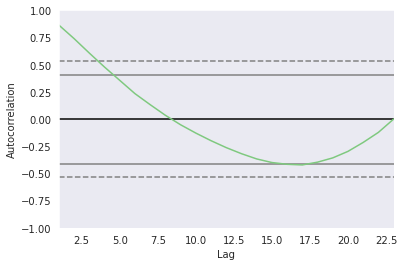

In [20]:
autocorrelation_plot(alucar['aumento'][1:])

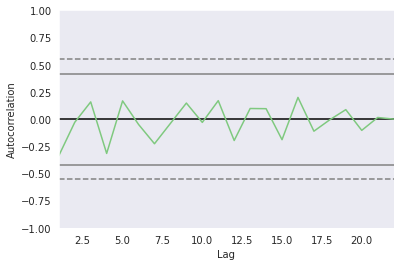

In [21]:
autocorrelation_plot(alucar['aceleracao'][2:])

In [22]:
assinantes = pd.read_csv('newsletter_alucar.csv') 
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [23]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [24]:
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()

In [25]:
assinantes

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


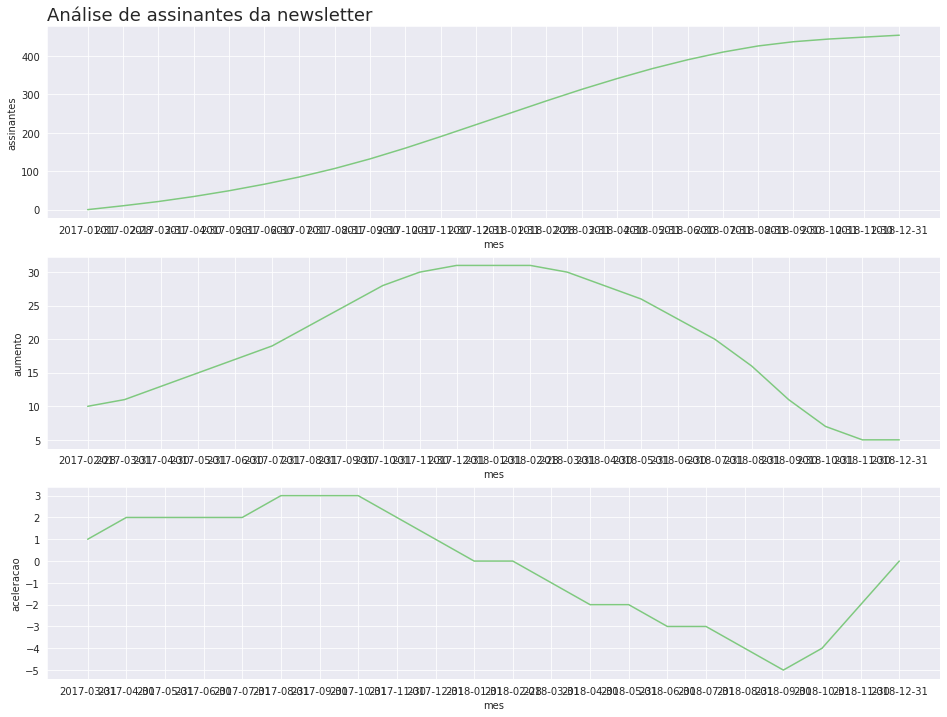

In [26]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

In [27]:
chocolura = pd. read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [28]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [29]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [30]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos 0


In [31]:
chocolura['aumento']= chocolura ['vendas'].diff()
chocolura['aceleracao']= chocolura ['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


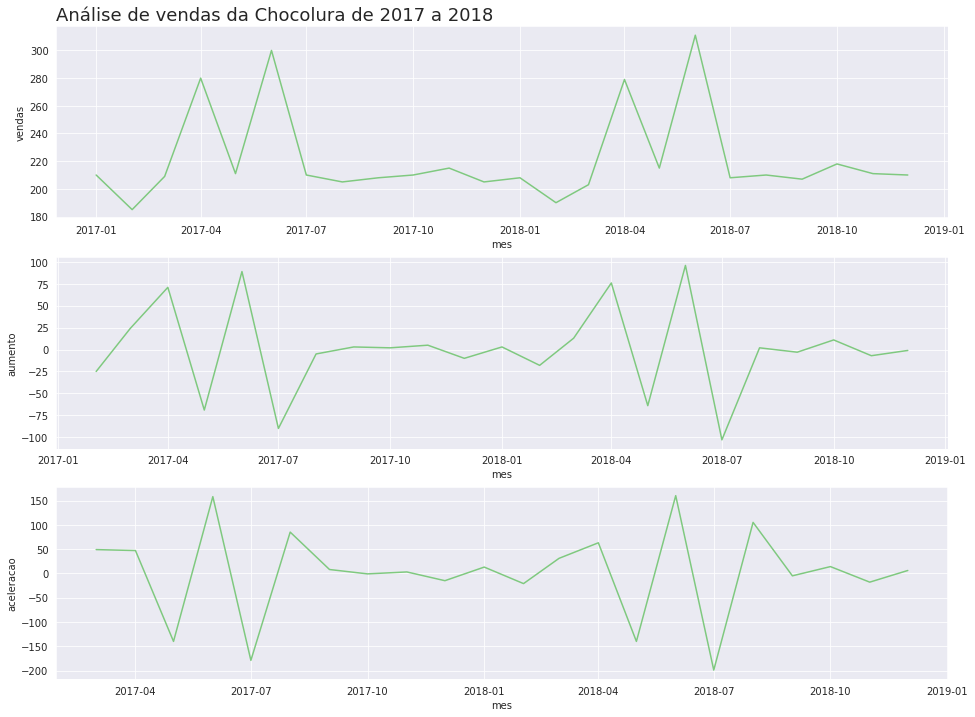

In [32]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 a 2018');

#sazonalidade -> padrão repetitivo em um certo período de tempo

In [33]:
vendas_por_dia = pd. read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [34]:
print('Quantidade de linhas:', vendas_por_dia.shape)
print('Quantidade de dados nulos', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos 0


In [35]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()

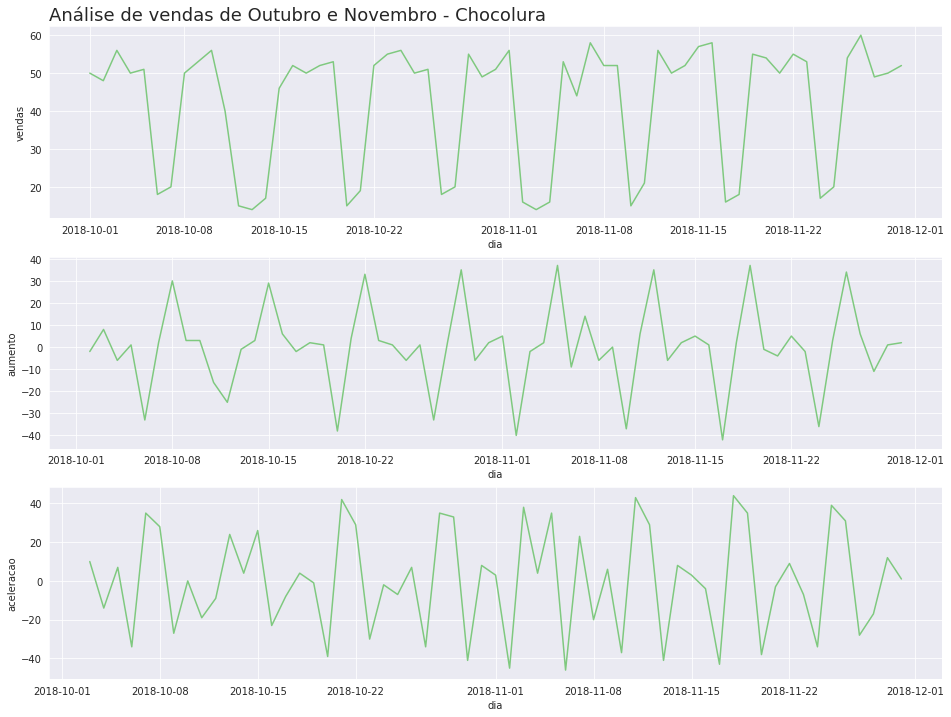

In [36]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura  ')

In [41]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
#função day_name() diz o dia da semana automaticamente
vendas_por_dia

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Monday
57,2018-11-27,60,6.0,-28.0,Tuesday
58,2018-11-28,49,-11.0,-17.0,Wednesday
59,2018-11-29,50,1.0,12.0,Thursday


In [45]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [46]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Friday,45.0,-7.0,-5.0
Monday,52.0,34.0,31.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0
Thursday,51.0,-2.0,-3.0
Tuesday,52.0,-1.0,-34.0
Wednesday,53.0,1.0,2.0


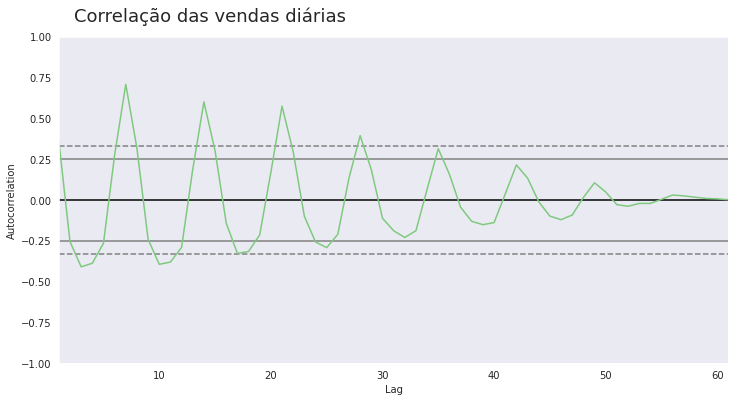

In [47]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

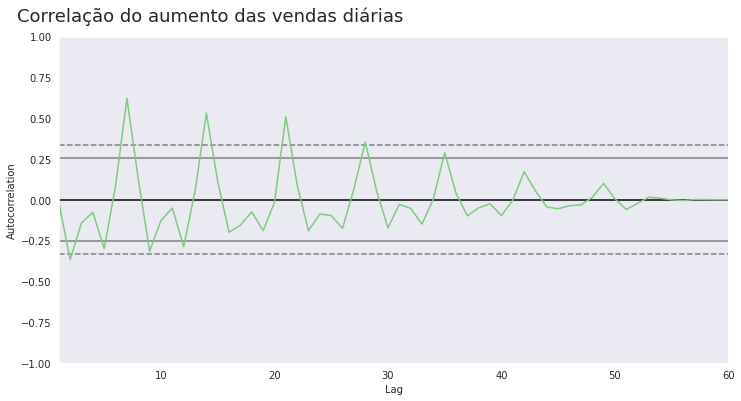

In [48]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

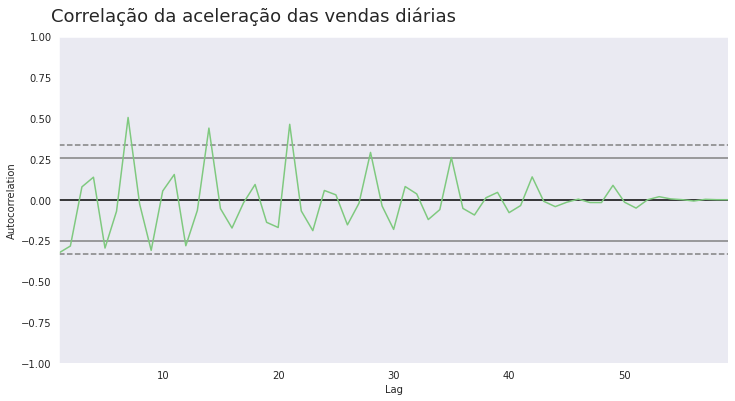

In [50]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

In [53]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [54]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [55]:
cafelura['mes']= pd.to_datetime(cafelura['mes'])

In [59]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


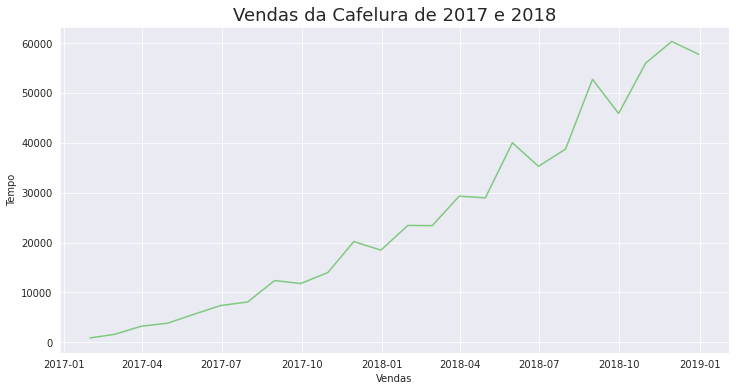

In [61]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [64]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')

In [65]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [69]:
cafelura['vendas_normalizadas']= cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


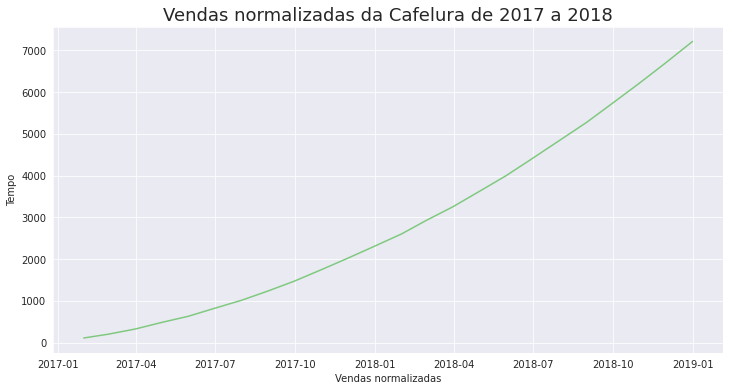

In [68]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

In [73]:
# "Será que existe alguma forma de passar os dados e eles nos mostrarem o que será a tendência, 
# a sazonalidade e o ruído de uma só vez?"

from statsmodels.tsa.seasonal import seasonal_decompose

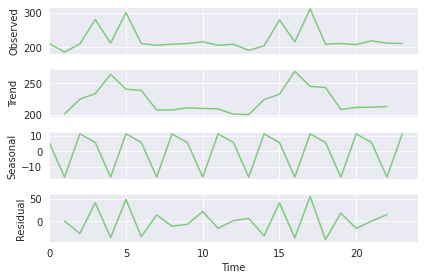

In [82]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

In [77]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [78]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head

<bound method NDFrame.head of     observacao  tendencia  sazonalidade  ruido
0          210      210.0           0.0    0.0
1          185      185.0           0.0    0.0
2          209      209.0           0.0    0.0
3          280      280.0           0.0    0.0
4          211      211.0           0.0    0.0
5          300      300.0           0.0    0.0
6          210      210.0           0.0    0.0
7          205      205.0           0.0    0.0
8          208      208.0           0.0    0.0
9          210      210.0           0.0    0.0
10         215      215.0           0.0    0.0
11         205      205.0           0.0    0.0
12         208      208.0           0.0    0.0
13         190      190.0           0.0    0.0
14         203      203.0           0.0    0.0
15         279      279.0           0.0    0.0
16         215      215.0           0.0    0.0
17         311      311.0           0.0    0.0
18         208      208.0           0.0    0.0
19         210      210.0     

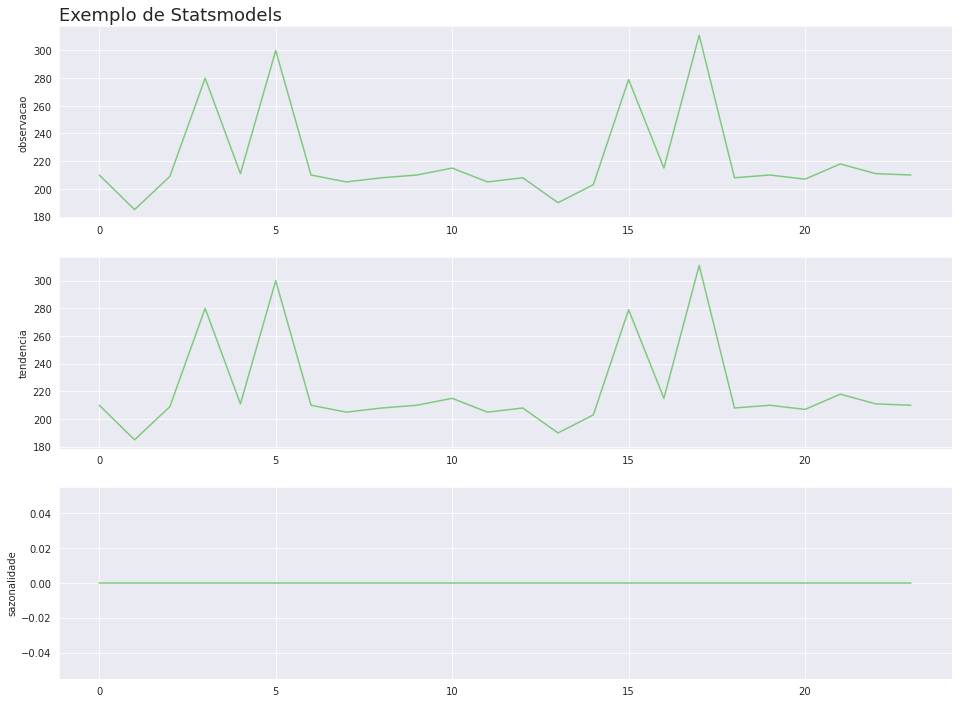

In [81]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

In [83]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [84]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [85]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


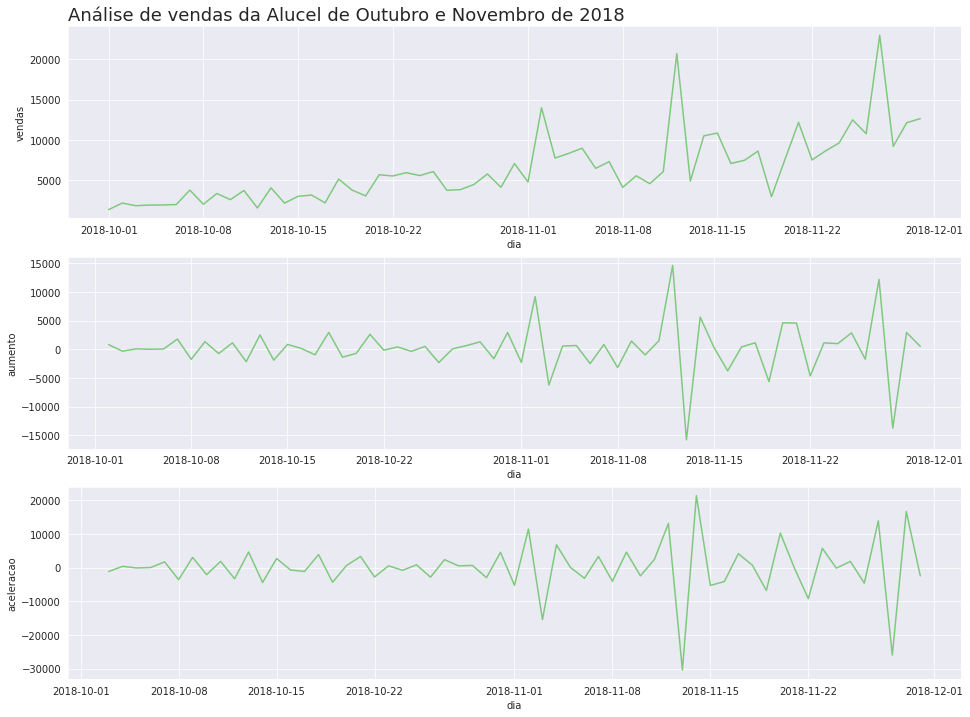

In [87]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

In [89]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean() #média móvel de 7 dias

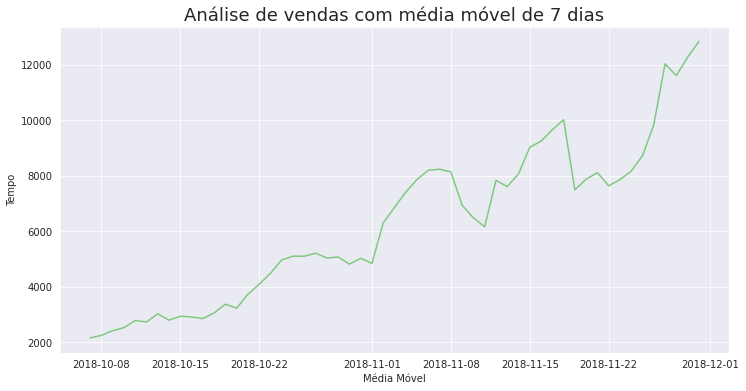

In [90]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

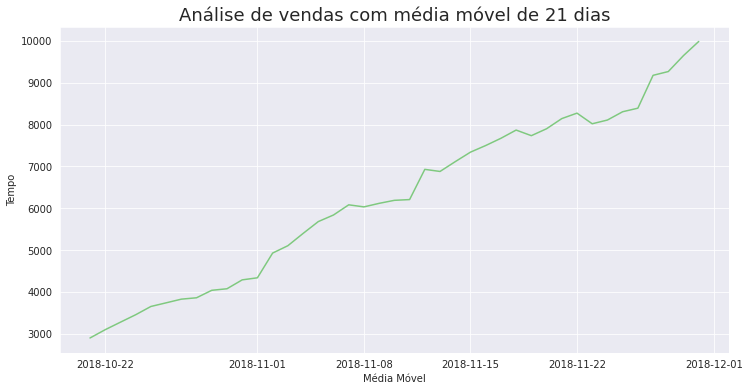

In [92]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
#média móvel de 21 dias
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

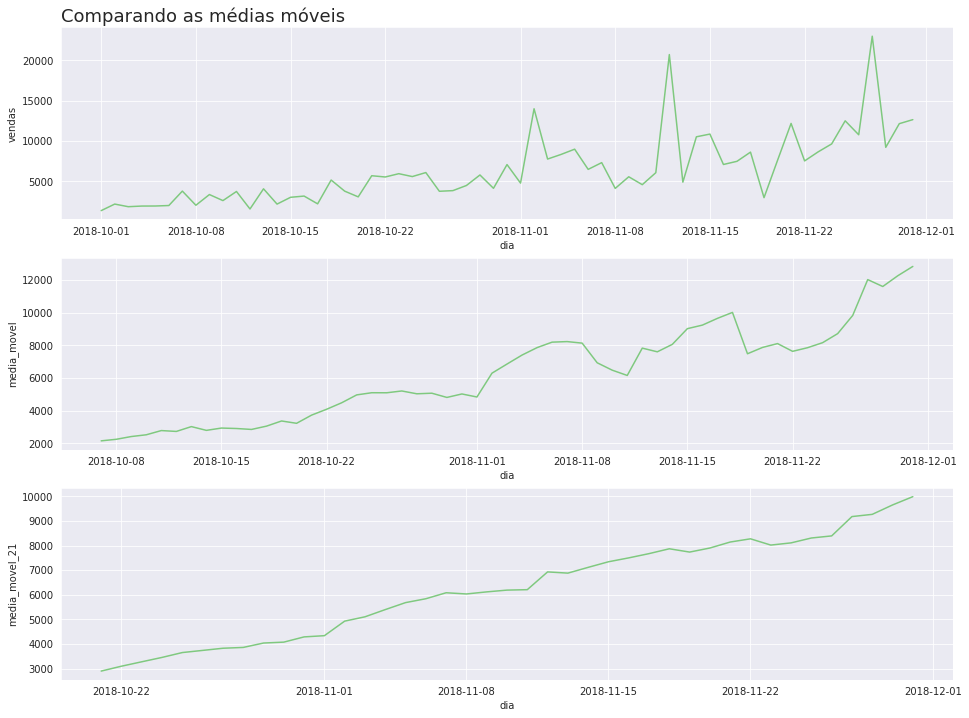

In [93]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')